### **Distribution-free test (Wilcoxon signed-rank test)**

In [8]:
import scipy.stats as stats
import numpy as np

# Example: Wilcoxon signed-rank test (non-parametric)
data = np.random.randn(100)
result = stats.wilcoxon(data)
print("Wilcoxon Signed-Rank Test Result:")
print(result)

#or
signed_rank, p_value=result
print(f"Signed Rank: {signed_rank}")
print(f"P-Value: {p_value}")

Wilcoxon Signed-Rank Test Result:
WilcoxonResult(statistic=2127.0, pvalue=0.17117023411272703)
Signed Rank: 2127.0
P-Value: 0.17117023411272703


#### **Chi-squared test**

In [9]:
# Example: Chi-squared test for goodness of fit
observed_values = np.array([18, 22, 20, 25, 15])
expected_values = np.array([20, 20, 20, 20, 20])

chi2_stat, p_value = stats.chisquare(f_obs=observed_values, f_exp=expected_values)
print("Chi-squared Statistic:", chi2_stat)
print("P-Value:", p_value)


Chi-squared Statistic: 2.9
P-Value: 0.5746972058298043


#### **Chi-square test for Homogeneity**

In [10]:
# Example: Chi-squared test for homogeneity
observed_values = np.array([[50, 30], [20, 25]])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed_values)
print("Chi-squared Statistic:", chi2_stat)
print("P-Value:", p_value)


Chi-squared Statistic: 3.1128810425685436
P-Value: 0.07767544916058475


#### **Chi-square test for Independence**

In [12]:
import numpy as np
from scipy.stats import chi2_contingency

# Observed values for independence
observed_values_independence = np.array([[25, 15, 10], [20, 30, 25], [15, 25, 30]])

# Chi-squared Test for Independence
chi2_independence, p_independence, _, _ = chi2_contingency(observed_values_independence)
print(f"Chi-squared Independence: {chi2_independence}")
print(f"P-Value Independence: {p_independence}")


Chi-squared Independence: 13.812925170068029
P-Value Independence: 0.007916689830293581


#### **Fixed Level Testing**

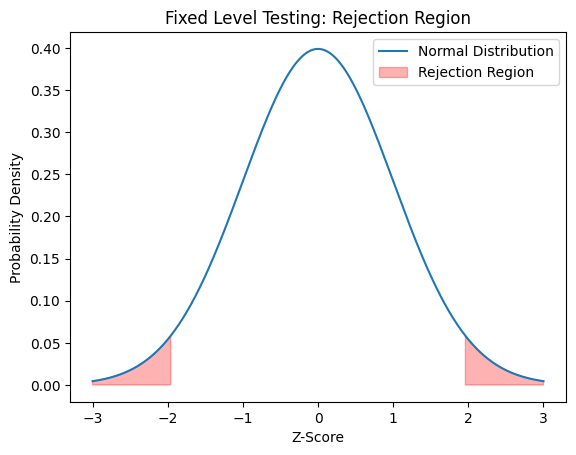

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the significance level (alpha)
alpha = 0.05

# Create a normal distribution
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x, 0, 1)

# Visualize the rejection region
plt.plot(x, y, label="Normal Distribution")
rejection_region = np.abs(x) > norm.ppf(1 - alpha / 2)
plt.fill_between(x, 0, y, where=rejection_region, color="red", alpha=0.3, label="Rejection Region")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.title("Fixed Level Testing: Rejection Region")
plt.legend()
plt.show()


#### **Type I and Type II errors**

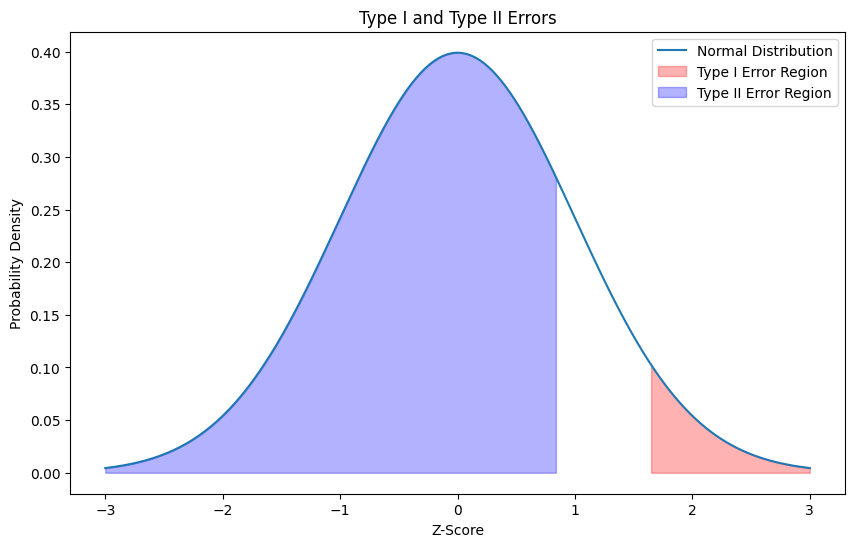

In [17]:
# Probability of Type I Error (alpha)
alpha = 0.05

# Probability of Type II Error (beta)
beta = 0.2

# Visualize the probabilities on a normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Normal Distribution")
type_i_region = (x > norm.ppf(1 - alpha))
plt.fill_between(x, 0, y, where=type_i_region, color="red", alpha=0.3, label="Type I Error Region")
type_ii_region = (x < norm.ppf(1 - beta))
plt.fill_between(x, 0, y, where=type_ii_region, color="blue", alpha=0.3, label="Type II Error Region")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.title("Type I and Type II Errors")
plt.legend()
plt.show()


#### **Power of a test**

In [18]:
# Given alpha, effect size, and sample size, calculate the power of a test.
from statsmodels.stats.power import TTestIndPower

alpha = 0.05
effect_size = 0.5
sample_size = 100

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha)
print(f"Power of the test: {power}")


Power of the test: 0.9404271933839895


#### **Factors affecting power of a test**

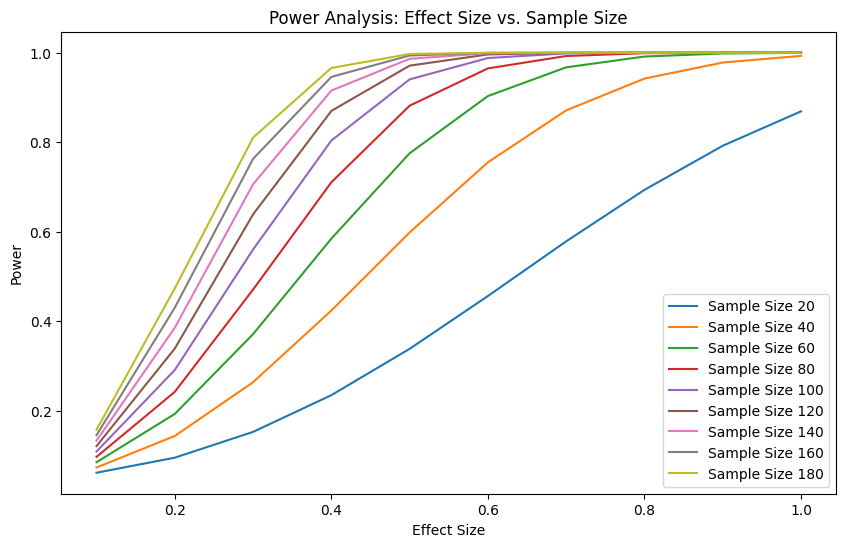

In [19]:
# Visualize the relationship between power, effect size, and sample size.
effect_sizes = np.linspace(0.1, 1.0, 10)
sample_sizes = np.arange(20, 200, 20)

plt.figure(figsize=(10, 6))
for size in sample_sizes:
    powers = [power_analysis.solve_power(effect_size=effect, nobs1=size, alpha=alpha) for effect in effect_sizes]
    plt.plot(effect_sizes, powers, label=f"Sample Size {size}")

plt.xlabel("Effect Size")
plt.ylabel("Power")
plt.title("Power Analysis: Effect Size vs. Sample Size")
plt.legend()
plt.show()


#### **Uncertainties in regression coefficients**

In [20]:
# Fit a linear regression model and obtain standard errors of coefficients.
import statsmodels.api as sm
import pandas as pd

# Example data
np.random.seed(0)
x = np.random.rand(100)
y = 2 * x + 1 + np.random.randn(100)

# Create a DataFrame
df = pd.DataFrame({'X': x, 'Y': y})

# Fit the model
model = sm.OLS(df['Y'], sm.add_constant(df['X'])).fit()

# Get standard errors of coefficients
print("Standard Errors:")
print(model.bse)


Standard Errors:
const    0.193292
X        0.349053
dtype: float64


#### **Simple Linear Regression**

In [13]:
import pandas as pd
from scipy.stats import linregress

# Sample data for regression
data_regression = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [2, 4, 5, 4, 5]})

# Linear regression analysis
slope, intercept, r_value, p_value_regression, std_err = linregress(data_regression['X'], data_regression['Y'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-Value Regression: {p_value_regression}")
print(f"Standard Error: {std_err}")


Slope: 0.6000000000000001
Intercept: 2.1999999999999997
R-squared: 0.6000000000000002
P-Value Regression: 0.12402706265755441
Standard Error: 0.28284271247461895


#### **Predictions using regression models**

In [14]:
# Predictions using Regression Models
x_new = 6
y_pred = intercept + slope * x_new
print(f"Predicted Y for X={x_new}: {y_pred}")


Predicted Y for X=6: 5.800000000000001


#### **Checking assumptions and transforming data**

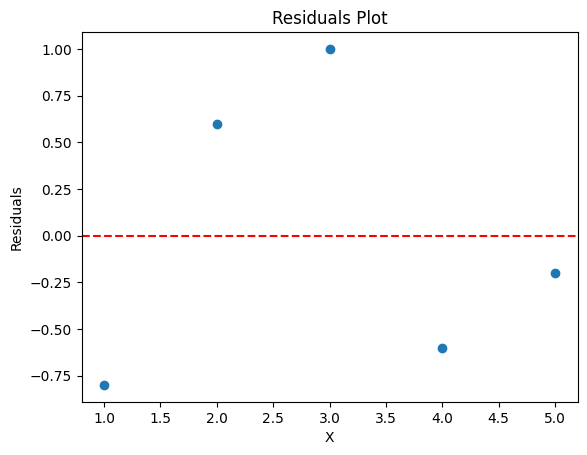

In [15]:
import matplotlib.pyplot as plt

# Checking Assumptions and Transforming Data
residuals = data_regression['Y'] - (intercept + slope * data_regression['X'])
plt.scatter(data_regression['X'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
